# Analysis of French museums' collections (Joconde database)

#### <br> *Download the open data CSV file [here](https://www.data.gouv.fr/fr/datasets/5b435ff2c751df675059dde9/) named joconde-MUSEES-valid.csv*

#### <br> Load the table from the CSV file

##### *Initial fiels are named REF|INV|DOMN|DENO|TITR|AUTR|PERI|EPOQ|TECH|DIMS|DECV|STAT|LOCA|COPY standing for : the id of the record, the number of the object, the domain, the type, the title, the author, the time period, the epoch, the material and technique, the dimensions, the discovery, the juridical status, the place of preservation and the source and data of the record*

In [186]:
# REF|INV|DOMN|DENO|TITR|AUTR|PERI|EPOQ|TECH|DIMS|DECV|STAT|LOCA|COPY
# ID-notice / Numéro de l'objet / Domaine / Dénomination / Titre / Auteur / Période de création / Epoque / Matériaux-techniques /
# Dimensions / Découverte / Statut juridique / Lieu de conservation / Source et date de la notice 

import pandas as pd
full_df = pd.read_csv('joconde-MUSEES-valid.csv', sep='|', header=0, encoding='utf-8', dtype=str)
full_df['PROPERTY'] = full_df['STAT'].str.split(';').str[0]
full_df['CITY'] = full_df['LOCA'].str.split(';').str[0]
full_df['CITY'].fillna("", inplace=True)
full_df['PLACE'] = full_df['LOCA'].str.split(';').str[-1]
full_df['RECORD_SOURCE'] = full_df['COPY'].apply(lambda x: ", ".join(str(x).split(',')[0:len(str(x).split(','))-1]).strip())
full_df['RECORD_DATE'] = full_df['COPY'].str.split(',').str[-1]
full_df['RECORD_DATE'] = pd.to_numeric(full_df['RECORD_DATE'], errors='coerce').fillna(0)
full_df['RECORD_DATE'] = full_df['RECORD_DATE'].astype('int64') 
df = full_df[['REF','DOMN','DENO','TITR','AUTR','PERI','TECH','DIMS','PROPERTY','CITY','PLACE','RECORD_SOURCE','RECORD_DATE']]
df.sample(3)

,REF,DOMN,DENO,TITR,AUTR,PERI,TECH,DIMS,PROPERTY,CITY,PLACE,RECORD_SOURCE,RECORD_DATE
501146,01610008876,archéologie ; architecture ; gallo-romain,plaque ; fragment,Fragment de panneau taillé et mouluré,anonyme (sculpteur),NaN,"schiste, taille, mouluré",Hauteur en cm 10.70 ; Largeur en cm 9.80 ; Epa...,propriété de la commune,Autun,musée Rolin,"© Autun, musée Rolin, © Service des musées d...",2014
328762,50350508549,dessin,NaN,"Trophée de chasse avec cors, gibecières, pique...",SAINT-AUBIN Charles Germain de,18e siècle,plume ; encre brune ; lavis gris ; pierre noire,"H. en m 0,159 ; L. en m 0,215",propriété de l'Etat,Paris,musée du Louvre département des Arts graphiques,© musée du Louvre département des Arts graphiq...,2005
185132,50350124266,dessin,NaN,"Jeune femme nue, un voile sur les jambes, joua...",SOLON Marc Louis Emmanuel,19e siècle ; 20e siècle,estompe ; mine de plomb ; blanc (rehaut),"H. en m 0,155 ; L. en m 0,155",propriété de l'Etat,Paris,musée du Louvre département des Arts graphiques,© musée du Louvre département des Arts graphiq...,1995


#### About the Joconde database

In [187]:
print('{} objects listed in the Joconde database'.format(df['REF'].count()))

589277 objects listed in the Joconde database


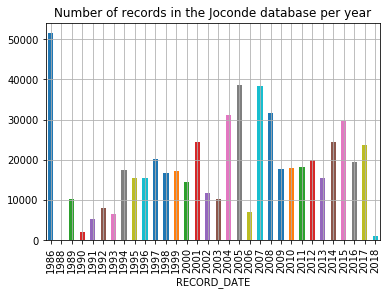

In [188]:
date_serie = df.query('RECORD_DATE > 1900').groupby('RECORD_DATE')['RECORD_DATE'].count()
date_serie.plot('bar', grid=True, title='Number of records in the Joconde database per year')

#### <br> French cities with most works (top 10)

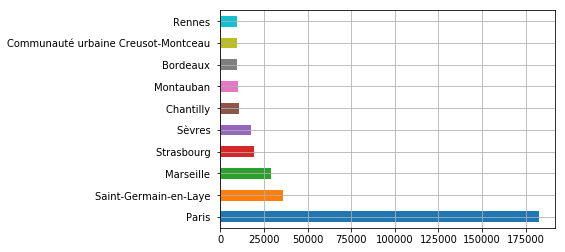

In [189]:
df['CITY'].value_counts().nlargest(10).plot('barh', grid=True)

##### Focus on Saint-Germain-en-Laye

In [190]:
df[df['CITY'].str.contains('Saint-Germain-en-Laye')]['PLACE'].value_counts()

 musée d'Archéologie nationale        35889
 musée départemental Maurice Denis       11
 manquant                                 1
Name: PLACE, dtype: int64

#### <br> French museums with most works (top 10)

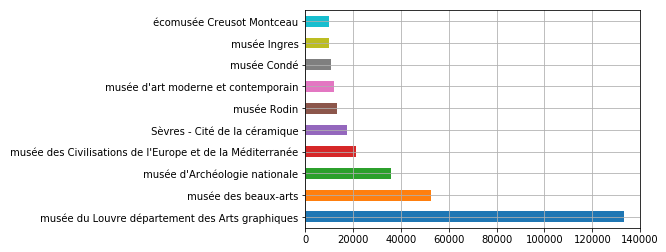

In [191]:
df['PLACE'].value_counts().nlargest(10).plot('barh', grid=True)

#### <br> Main authors of the works (top 20)

In [192]:
df['AUTR'].value_counts().nlargest(20)

anonyme                                                       52238
RODIN Auguste                                                 12739
CHAPU Henri Michel Antoine                                     9520
BOUDIN Eugène                                                  7848
MOREAU Gustave                                                 6668
BARLA Jean-Baptiste (attribué à)                               5093
JEAN-HAFFEN Yvonne                                             5040
CHASSERIAU Théodore                                            4966
manufacture de Sèvres                                          4111
COROT Jean-Baptiste Camille                                    4109
DELACROIX Eugène                                               4007
manufacture indéterminée                                       3642
UNGERER Tomi (dit), UNGERER Jean Thomas (patronyme)            3435
anonyme (photographe)                                          3376
INGRES Jean Auguste Dominique                   

#### <br> Property of the works

In [193]:
df['PROPERTY'].value_counts().nlargest(4)

propriété de l'Etat                  278405
propriété de la commune              207120
propriété du département              16090
propriété privée personne morale      12451
Name: PROPERTY, dtype: int64

#### <br> Main types of works

In [194]:
df['DOMN'].value_counts().nlargest(8)

dessin                       233864
peinture                      64694
estampe                       34751
sculpture                     29987
archéologie ; néolithique     13832
photographie ; ethnologie     10857
photographie                  10419
céramique                      9667
Name: DOMN, dtype: int64

In [195]:
df['DENO'].value_counts().nlargest(8)

album                             62191
tableau                           62006
élément d'ensemble                16748
carte postale                     11645
tirage photographique              7810
statuette                          4996
carte réclame                      4945
plaque de verre photographique     4749
Name: DENO, dtype: int64